# IMPORTING NECESSARY  DEPENDENCIES(LIBRARIES)

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# TASK 1 :
Plot all sample points (train data) from both classes, but samples from the same class should have the same color and marker.

In [2]:
training_set = []
training_set = pd.read_csv('train.txt',sep=" ",header = None)
print('Numeric Visualization of Training Set: ')
print(training_set)
training_set=training_set.to_numpy()

Numeric Visualization of Training Set: 
    0  1  2
0   2  2  1
1   3  1  1
2  -4  3  2
3   3  3  1
4  -1 -3  1
5   2  6  2
6   4  2  1
7  -2 -2  1
8   0  0  2
9  -2  2  2
10 -1 -1  2
11 -4  2  2


In [3]:
m = []
n = []
for data_class in training_set:
    if data_class[2]==1:
        m.append([data_class[0], data_class[1]])
    elif data_class[2]==2:
        n.append([data_class[0], data_class[1]])
        
first_training_class,second_training_class = (np.array(m),np.array(n))
print("\nFirst Training Class ::")
print(first_training_class)
print("\nSecond Training Class ::")
print(second_training_class)



First Training Class ::
[[ 2  2]
 [ 3  1]
 [ 3  3]
 [-1 -3]
 [ 4  2]
 [-2 -2]]

Second Training Class ::
[[-4  3]
 [ 2  6]
 [ 0  0]
 [-2  2]
 [-1 -1]
 [-4  2]]


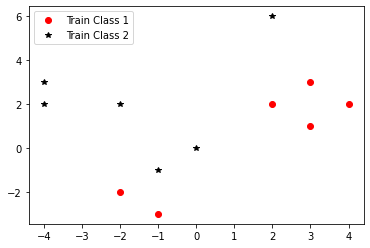

In [4]:
plt.plot(first_training_class[:,0:1],first_training_class[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(second_training_class[:,0:1],second_training_class[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.legend()
plt.show()

# TASK 2: 
Using a minimum distance classifier with respect to ‘class mean’, classify the test data points by
plotting them with the designated class-color but a different marker. Use the Linear Discriminant
Function given below. Also, plot the class means.


# \begin{equation}
g_i(X) = X^T  \bar{_iY} - \frac{1}{2} \bar{_iY}^T \bar{_iY}
\end{equation}

In [5]:
testing_set = pd.read_csv('test.txt',sep=" ",header = None)
print('Numeric Visualization of Testing Set')
print(testing_set)

X_test,Y_test = (testing_set.iloc[:, [0,1]].values , testing_set.iloc[:, [2]].values)
print('\nFeatures ')
print(X_test)
print('\nLabels ')
print(Y_test)
X_test=np.array(X_test)
predicted_results=[]

Numeric Visualization of Testing Set
   0  1  2
0 -1 -5  1
1  3  2  1
2 -2  1  2
3  8  2  1
4  6 -1  1
5  0  2  1
6 -3  0  2

Features 
[[-1 -5]
 [ 3  2]
 [-2  1]
 [ 8  2]
 [ 6 -1]
 [ 0  2]
 [-3  0]]

Labels 
[[1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]]


### Finding Class

In [6]:


first_mean_class = np.array([0,0])
second_mean_class = np.array([0,0])

def class_determination(weight = np.array([])):    
    g1 = (np.matmul(weight.T,first_mean_class))+0.5*(np.matmul(first_mean_class.T,first_mean_class))
    g2 = (np.matmul(weight.T,second_mean_class))+0.5*(np.matmul(second_mean_class.T,second_mean_class))
    
    if(g1 >=g2):
        predicted_results.extend([1])
        return 1
    else:
        predicted_results.extend([2])
        return 2

    
    
first_mean_class[0],first_mean_class[1] = np.mean(first_training_class[:,0:1]),np.mean(first_training_class[:,1:])
second_mean_class[0],second_mean_class[1] = np.mean(second_training_class[:,0:1]),np.mean(second_training_class[:,1:])



In [7]:
test_a = []
test_b = []
for i in range(len(X_test)):
    if(class_determination(X_test[i])==1):
        test_a.append([X_test[i][0],X_test[i][1]])
    else:
        test_b.append([X_test[i][0],X_test[i][1]])

first_test_class = np.array(test_a)
second_test_class = np.array(test_b)

print(first_test_class)
print(second_test_class)

[[-1 -5]
 [ 3  2]
 [ 8  2]
 [ 6 -1]]
[[-2  1]
 [ 0  2]
 [-3  0]]


#### Plotting the Means of  
#### 1) Training Dataset
#### 2) Test Dataset

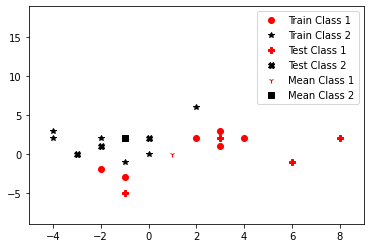

In [8]:
plt.xlim(-5,9)
plt.ylim(-9, 19)
plt.rcParams["figure.figsize"] = (10,4)
plt.plot(first_training_class[:,0:1],first_training_class[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(second_training_class[:,0:1],second_training_class[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.plot(first_test_class[:,0:1],first_test_class[:, 1:], linestyle = '', marker='P', color='r', label ="Test Class 1")
plt.plot(second_test_class[:,0:1],second_test_class[:, 1:], linestyle = '', marker = 'X', color = 'k', label ="Test Class 2")
plt.plot(first_mean_class[0],first_mean_class[1], linestyle = '', marker='1', color='r', label ="Mean Class 1")
plt.plot(second_mean_class[0],second_mean_class[1], linestyle = '', marker = 's', color = 'k', label ="Mean Class 2")
plt.legend()
plt.show()

# TASK 3 :
Draw the decision boundary between the two classes.
### Determining Line Equation



###  $y=mx+c$ 

### $ m = (\omega_1^T - \omega_2^T)$

### $c = 0.5 *  (\omega_1^T\omega_1 - \omega_2^T\omega_2)$

In [9]:
mean_1 = np.array([[first_mean_class[0]], [second_mean_class[0]]])
mean_2 = np.array([[first_mean_class[1]], [second_mean_class[1]]])


x_values = []
y_values = []
rangez=np.arange(-5, 9, 0.5)
for i in rangez:
    y = (first_mean_class[0]-second_mean_class[0])*i-0.5*(np.dot(mean_1.T, mean_1))+0.5*(np.dot(mean_2.T, mean_2))
    z = y/(first_mean_class[1]-second_mean_class[1])
    x_values.append(i)
    y_values.append(-z[0][0])

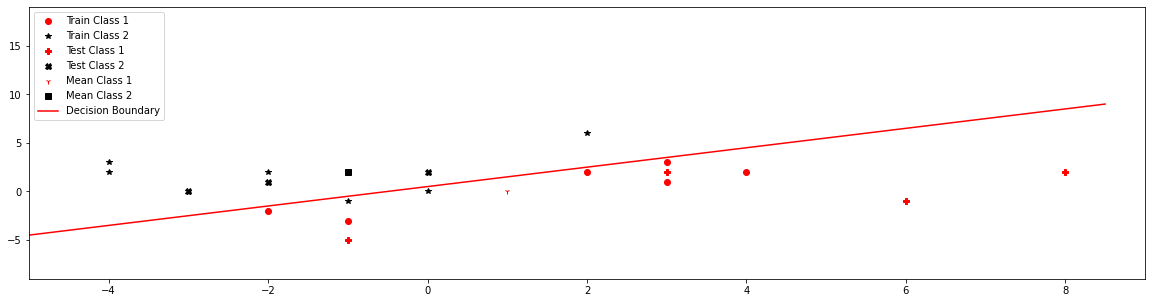

In [15]:
plt.xlim(-5,9)
plt.ylim(-9, 19)
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(first_training_class[:,0:1],first_training_class[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(second_training_class[:,0:1],second_training_class[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.plot(first_test_class[:,0:1],first_test_class[:, 1:], linestyle = '', marker='P', color='r', label ="Test Class 1")
plt.plot(second_test_class[:,0:1],second_test_class[:, 1:], linestyle = '', marker = 'X', color = 'k', label ="Test Class 2")
plt.plot(first_mean_class[0],first_mean_class[1], linestyle = '', marker='1', color='r', label ="Mean Class 1")
plt.plot(second_mean_class[0],second_mean_class[1], linestyle = '', marker = 's', color = 'k', label ="Mean Class 2")
plt.plot(x_values, y_values, linestyle='-', color='r', label="Decision Boundary")
plt.legend()
plt.show()

# TASK 4:
Calculation of accuracy

In [11]:
accuracy = accuracy_score(Y_test,predicted_results)
print('Accuracy = ', accuracy)

Accuracy =  0.8571428571428571
